In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
len(X_train)

60000

In [3]:
len(X_test)

10000

In [4]:
X_train[0].shape

(28, 28)

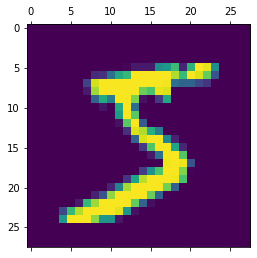

In [5]:
plt.matshow(X_train[0])

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
X_train = X_train / 255
X_test = X_test / 255

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_test_flattened.shape

(10000, 784)

In [8]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7314 - accuracy: 0.8070
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3049 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2815 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2691 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2634 - accuracy: 0.9256


In [10]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2709 - accuracy: 0.9240


[0.27087166905403137, 0.9240000247955322]

In [11]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.4489611e-02, 4.0333654e-07, 7.8359187e-02, 9.6167386e-01,
       2.3979545e-03, 1.1209625e-01, 2.0863920e-06, 9.9975640e-01,
       9.8868698e-02, 6.6645932e-01], dtype=float32)

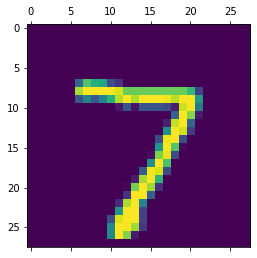

In [12]:
plt.matshow(X_test[0])

In [13]:
np.argmax(y_predicted[0])

7

In [14]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [15]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    4,    2,    2,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   7,   10,  905,   33,   10,    1,   12,   10,   40,    4],
       [   1,    0,   13,  945,    0,   12,    2,   10,   18,    9],
       [   2,    2,    4,    2,  909,    0,    8,    4,    8,   43],
       [   9,    4,    2,   52,    9,  740,   16,    7,   46,    7],
       [  14,    3,    5,    2,    8,   10,  910,    2,    4,    0],
       [   1,    5,   20,   10,    8,    0,    0,  948,    3,   33],
       [   5,    9,    6,   27,    9,   16,    8,   13,  877,    4],
       [  10,    7,    1,   11,   20,    4,    0,   21,   10,  925]])>

Text(69.0, 0.5, 'Truth')

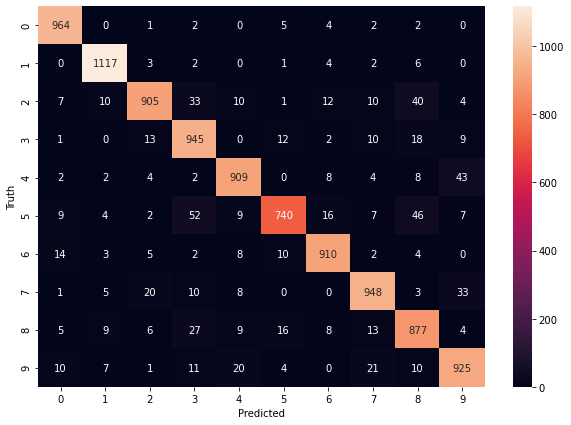

In [16]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [17]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4484 - accuracy: 0.8722
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1324 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0846 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0640 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0493 - accuracy: 0.9854


In [18]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9750


[0.07852982729673386, 0.9750000238418579]

Text(69.0, 0.5, 'Truth')

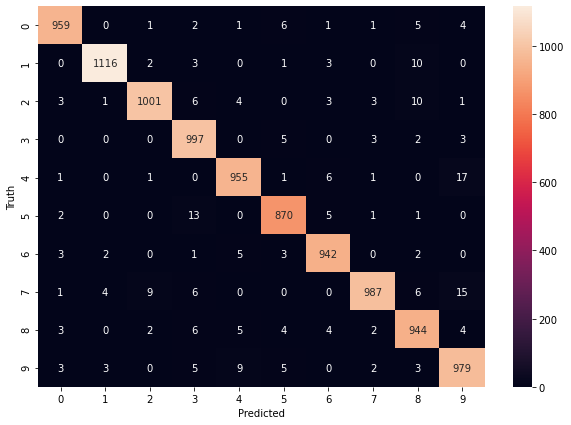

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4595 - accuracy: 0.8709
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1352 - accuracy: 0.9601
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0883 - accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0485 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0412 - accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0249 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0212 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9783


[0.08321566879749298, 0.9782999753952026]

In [22]:
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5
